In [178]:
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso,HuberRegressor
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor,ExtraTreesRegressor,RandomForestRegressor,HistGradientBoostingRegressor

In [179]:
df = pd.read_csv('sao-paulo-properties-april-2019.csv')
#df.drop(['Unnamed: 0'],axis=1,inplace=True)
#df.fillna(0, inplace=True)
#df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

In [188]:
df2 = df[df['Negotiation Type'] == 'sale']
df2.drop('Negotiation Type',axis=1,inplace=True)

df2 = df2[df2['Latitude'] > -23.8]
df2 = df2[df2['Latitude'] < -23.2]

df2['pm2'] = df2['Price'] / df2['Size']

q99 = df2.quantile(.99)
q95 = df2.quantile(.95)


df_cut = df2
df_cut['cut'] = (df2['Price'] > q99['Price'])|(df2['Size'] > q99['Size'])

df2 = df2.drop(df2[(df2['Price'] > q99['Price'])|(df2['Size']>q99['Size'])].index)


df2.describe()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude,pm2
count,5.853000e+03,5853.000000,5853.000000,5853.000000,5853.000000,5853.000000,5853.000000,5853.000000,5853.000000,5853.000000,5853.000000,5853.000000,5853.000000,5853.000000
mean,5.567094e+05,515.840765,75.578678,2.312148,2.039467,0.933368,1.308901,0.432940,0.118230,0.543824,0.033316,-23.559438,-46.611608,6836.023265
std,4.926575e+05,532.292887,41.228186,0.698684,0.856390,0.709762,0.683952,0.495525,0.322908,0.498118,0.179476,0.056789,0.090117,2903.261765
min,4.500000e+04,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-23.773509,-46.904378,1125.000000
25%,2.500000e+05,150.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.595000,-46.674448,4857.142857
50%,3.820000e+05,400.000000,62.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-23.552573,-46.632163,6173.529412
75%,6.700000e+05,700.000000,86.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,-23.521390,-46.555222,8117.647059
max,3.800000e+06,4950.000000,286.000000,5.000000,7.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,-23.398411,-46.313064,46212.166667


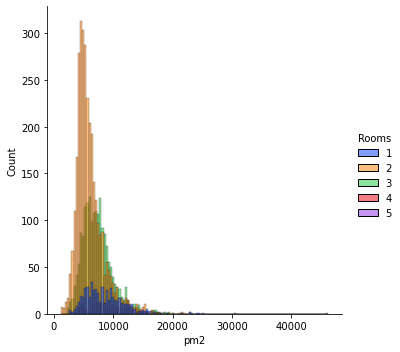

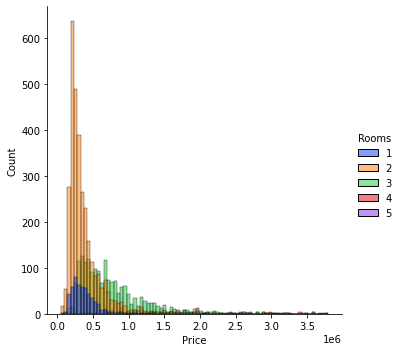

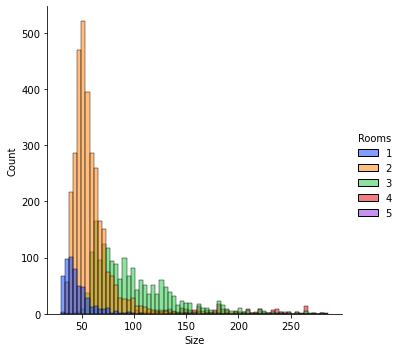

In [189]:
sns.displot(data=df2,x='pm2',hue='Rooms',palette='bright')
sns.displot(data=df2,x='Price',hue='Rooms',palette='bright')
sns.displot(data=df2,x='Size',hue='Rooms',palette='bright')

<Figure size 1080x720 with 0 Axes>

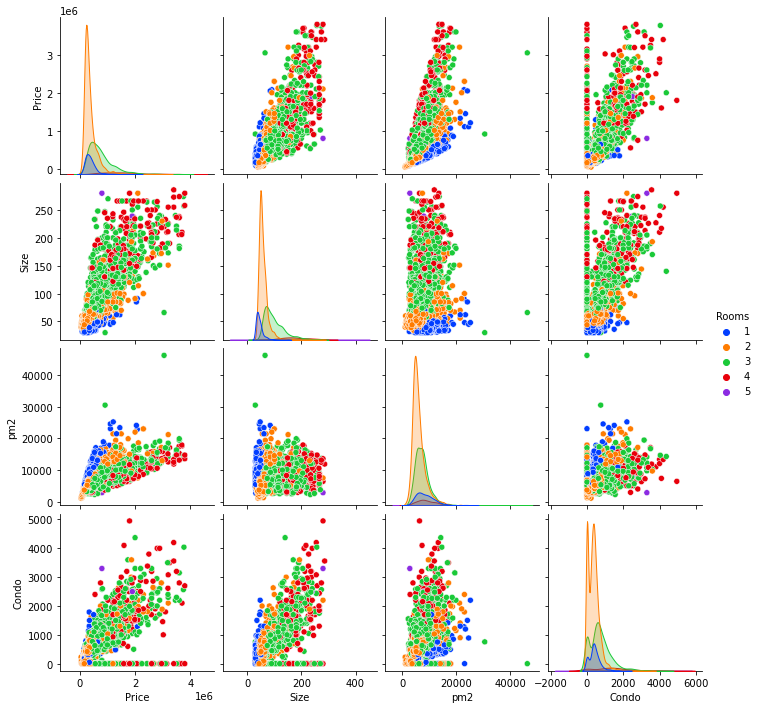

In [190]:
plt.figure(figsize=(15,10))
sns.pairplot(df2[['Price','Size','Rooms','pm2','Condo']],hue='Rooms',palette='bright')

count      5940
unique        2
top       False
freq       5853
Name: cut, dtype: object

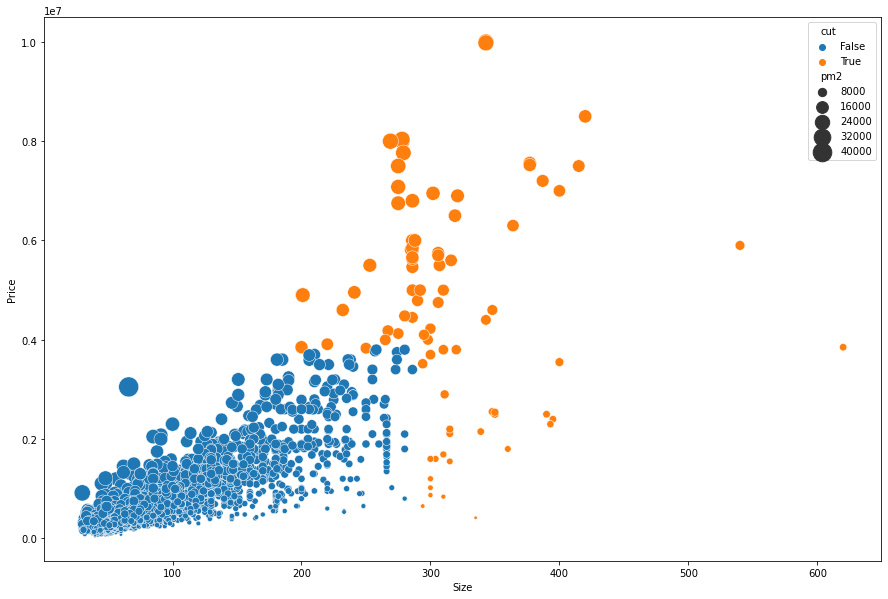

In [191]:
plt.figure(figsize=(15,10))

sns.scatterplot(data=df_cut,x='Size',y='Price',hue='cut',size='pm2',sizes=(10,400))

df_cut['cut'].describe()

<AxesSubplot:>

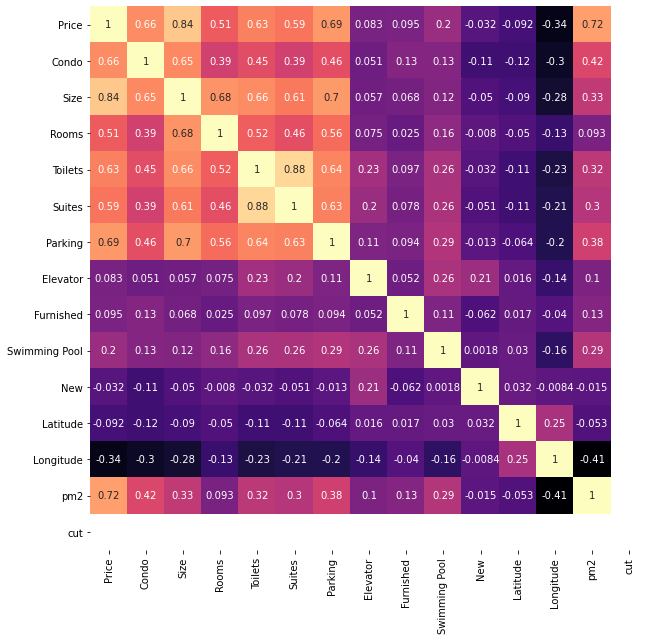

In [192]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(),cmap='magma',cbar=False,annot=True)

In [193]:
pm2 = df2.groupby('District',as_index =False)['pm2'].mean()
pm2 = pd.DataFrame(pm2).sort_values(by='pm2',ascending=False)

#df3



<AxesSubplot:xlabel='pm2', ylabel='District'>

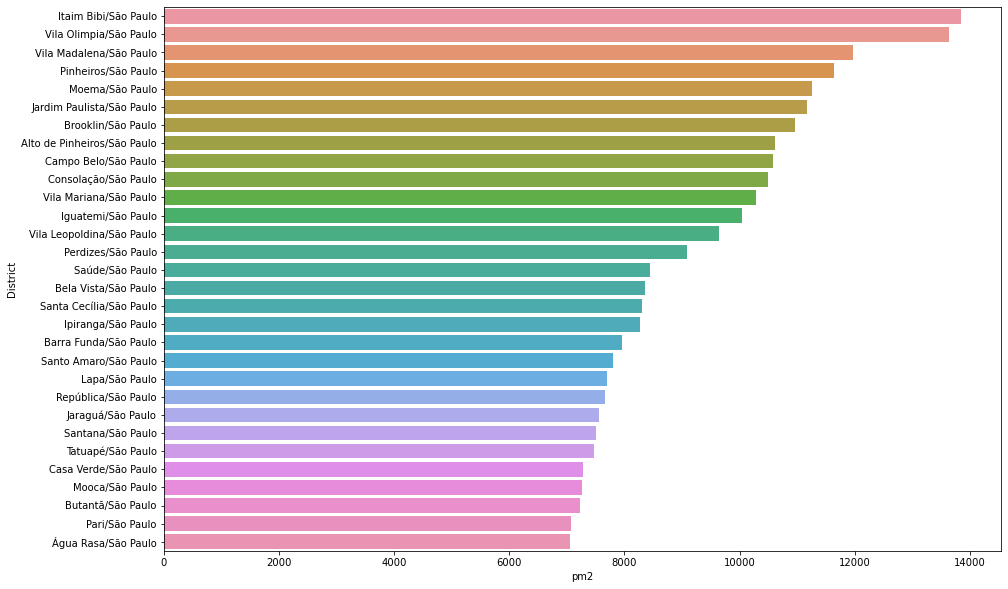

In [194]:
plt.figure(figsize=(15,10))

sns.barplot(y='District',x='pm2',data=pm2.head(30))

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

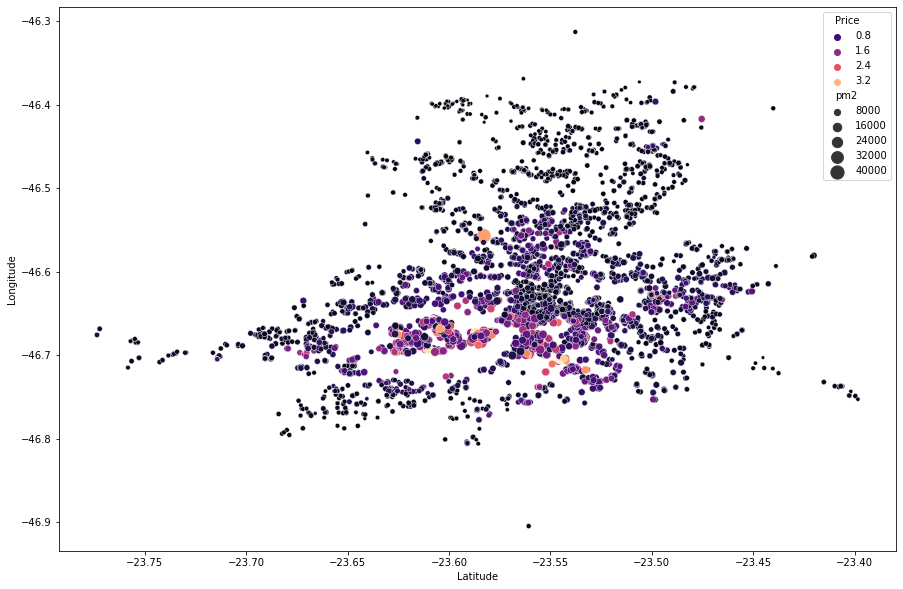

In [195]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df2,x='Latitude',y='Longitude',hue='Price',size='pm2',sizes=(10,200),palette='magma')

<AxesSubplot:xlabel='Parking', ylabel='pm2'>

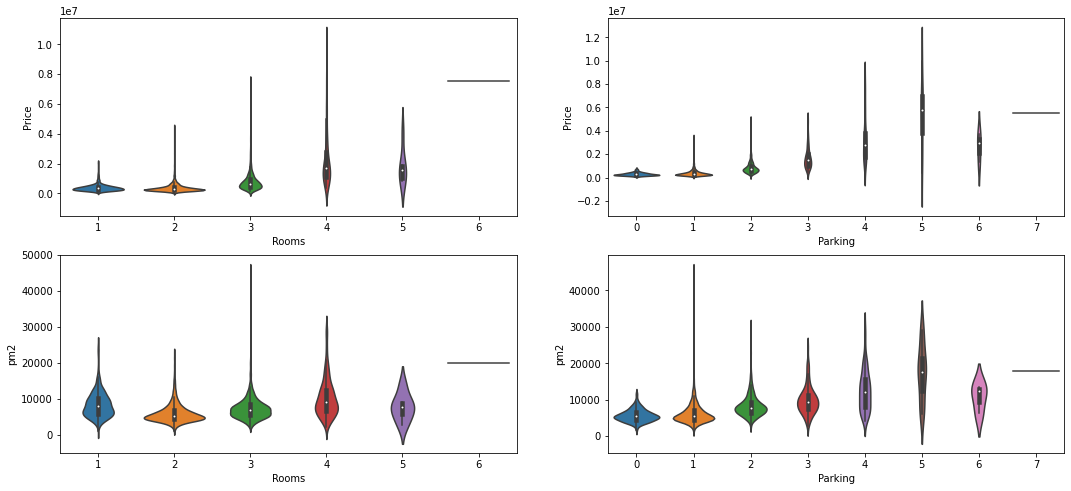

In [196]:
fig,axes = plt.subplots(2,2,figsize=(18,8))

sns.violinplot(ax=axes[0][0],y=df3['Price'],x=df3['Rooms'])
sns.violinplot(ax=axes[0][1],y=df3['Price'],x=df3['Parking'])
sns.violinplot(ax=axes[1][0],y=df3['pm2'],x=df3['Rooms'])
sns.violinplot(ax=axes[1][1],y=df3['pm2'],x=df3['Parking'])

<AxesSubplot:xlabel='Size', ylabel='Price'>

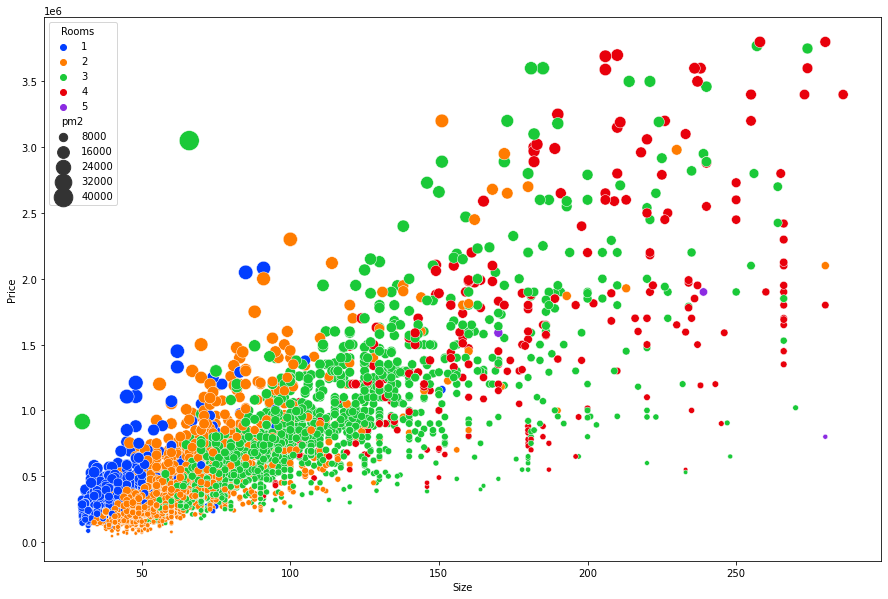

In [197]:
plt.figure(figsize=(15,10))

sns.scatterplot(data=df2,x='Size',y='Price',hue='Rooms',size='pm2',sizes=(10,400),palette='bright')

In [198]:
df3 = pd.get_dummies(df2,columns=['District'],drop_first=False)
x = df3.drop(['Property Type','pm2','Price'],axis=1)
y = df3['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [199]:
models = [
    LinearRegression(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    HistGradientBoostingRegressor(),
    RandomForestRegressor()]


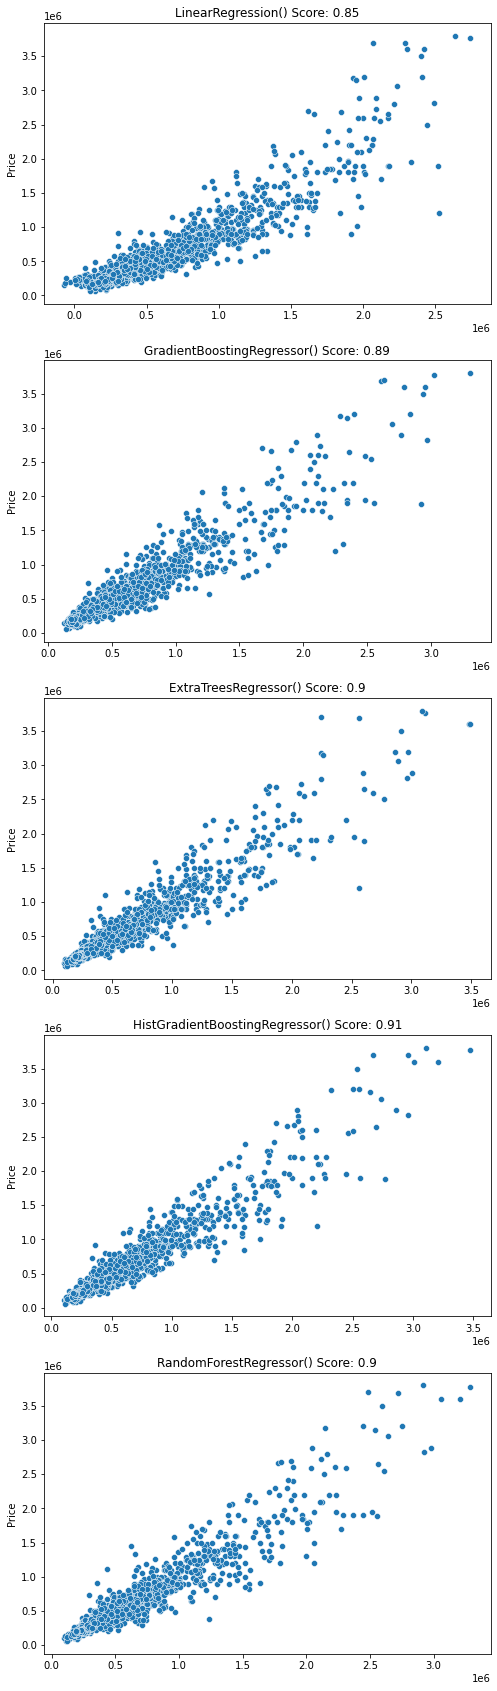

In [203]:
resultado = {'model':[],'score':[]}
fig,axes = plt.subplots(5,1,figsize=(8,30))

n=0
for model in models:
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    resultado['model'].append(str(model))
    resultado['score'].append(round(model.score(x_test,y_test),2))
    sns.scatterplot(ax=axes[n],x=prediction,y=y_test).set_title(f'{model} Score: {round(model.score(x_test,y_test),2)}')
    n+=1
    
df_result = pd.DataFrame(resultado)   

In [202]:
df_result

,model,score
0,LinearRegression(),0.85
1,GradientBoostingRegressor(),0.89
2,ExtraTreesRegressor(),0.90
3,HistGradientBoostingRegressor(),0.91
4,RandomForestRegressor(),0.89
